We will try to replicate the Figures in the Brumley Paper here.

In [1]:
import fluid_functions_copy as ff
import numpy as np

from cilia_test_copy import Cilium
from cilia_test_copy import Cilia_System

import matplotlib.pyplot as plt

In [2]:
#Define constants 
l_ambda = 0.1
r0= 0.5
lattice= 1
a_radii=0.01

f0 = lambda phi : 0

**Figure 3**

In [3]:
Cilia_1= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 0.1 ,10]), a= 0.01)
Cilia_2= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 1 ,10]), a= 0.01)
Cilia_3= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 2 ,10]), a= 0.01)
Cilia_4= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 5 ,10]), a= 0.01)
Cilia_5= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 10 ,10]), a= 0.01)

In [4]:
def velocity(cilium):
    
    zeta, r , phi= cilium.coor
    
    f_v= cilium.f_vector
    pos= cilium.pos
    
    R= cilium.basis_change
    
    dr_phi, dr, dz=  R.T @np.linalg.inv(ff.friction(pos)) @ R@ f_v 
        
    return np.array([ dz, dr , dr_phi /r])

def update(cilium, stepsize= 0.001):
    
    vel= velocity(cilium)
    cilium.coor += vel * stepsize

**Run Simulation**

In [5]:
p1=[]
p2=[]
p3=[]
p4=[]
p5=[]

r1=[]
r2=[]
r3=[]
r4=[]
r5=[]


for i in range (100000):
    update(Cilia_1, stepsize= 0.02)
    update(Cilia_2, stepsize= 0.02)
    update(Cilia_3, stepsize= 0.02)
    update(Cilia_4, stepsize= 0.02)
    update(Cilia_5, stepsize= 0.02)

for j in range(150000):
    
    update(Cilia_1, stepsize= 0.001)
    update(Cilia_2, stepsize= 0.001)
    update(Cilia_3, stepsize= 0.001)
    update(Cilia_4, stepsize= 0.001)
    update(Cilia_5, stepsize= 0.001)
    
    c1= Cilia_1.coor
    c2= Cilia_2.coor
    c3= Cilia_3.coor
    c4= Cilia_4.coor
    c5= Cilia_5.coor
    
    p1.append(c1[-1])
    r1.append(c1[1])
    
    p2.append(c2[-1])
    r2.append(c2[1])
    
    p3.append(c3[-1])
    r3.append(c3[1])
    
    p4.append(c4[-1])
    r4.append(c4[1])
    
    p5.append(c5[-1])
    r5.append(c5[1])

In [19]:
import pandas as pd 

pd.DataFrame(np.array([p1,r1])).to_csv('limit_cycles/0.1_lamb.csv')
pd.DataFrame(np.array([p2,r2])).to_csv("./limit_cycles/1_lamb.csv")
pd.DataFrame(np.array([p3,r3])).to_csv("./limit_cycles/2_lamb.csv")
pd.DataFrame(np.array([p4,r4])).to_csv("./limit_cycles/5_lamb.csv")
pd.DataFrame(np.array([p5,r5])).to_csv("./limit_cycles/10_lamb.csv")

In [17]:
pd.DataFrame(np.array([p1,r1])).to_csv('0.1_lamb.csv')

In [15]:
''' Hacky function which finds to find index of point that starts at pi/2 '''
def est_time(L1):
    
    L= np.array(L1) % (2*np.pi)
    
    low= next(x[0] for x in enumerate(L) if x[1] < 0.001)
    high= next(x[0] for x in enumerate(L[low:]) if x[1] > 6.28305)
        
    return high+2, low

''' Rescale r list'''
def r_mod(r_list, r0= 0.5):
    
    return (np.array(r_list) - r0)/r0

def limit_arr(p_list, r_list):
    
    a,b= est_time(p_list)
        
    return np.linspace(0,1, a), r_mod(r_list)[b:b+a]

def limit_arr2(p_list, r_list):
    
    a,b= est_time(p_list)
        
    return np.linspace(0,1, a), p_list[b:b+a]

**Figure 3c**

In [16]:
def plot_circle(p_list, r_list, r0= 0.5):
    
    x, y = (np.array(r_list) *np.sin(np.array(p_list)), np.array(r_list)*np.cos(np.array(p_list)))
    
    x_c, y_c = (r0 *np.sin(np.array(p_list)), r0 *np.cos(np.array(p_list)))
    
    '''Exaggerate difference by 100 times'''
    
    d=1
                
    return x_c + 100* (x - x_c), d + (y_c + 100* (y - y_c))

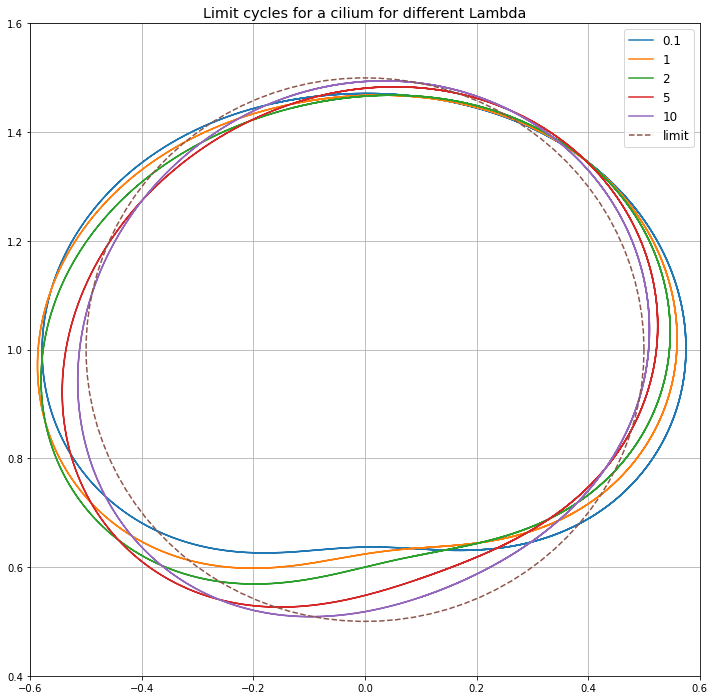

In [17]:
fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

phi_list=np.linspace(0,2*np.pi, 100)

x_c, y_c = (r0 *np.cos(np.array(phi_list)), 1+ r0 *np.sin(np.array(phi_list)))

x1_mod, y1_mod= plot_circle(p1, r1, r0= 0.5)
x2_mod, y2_mod= plot_circle(p2, r2, r0= 0.5)
x3_mod, y3_mod= plot_circle(p3, r3, r0= 0.5)
x4_mod, y4_mod= plot_circle(p4, r4, r0= 0.5)
x5_mod, y5_mod= plot_circle(p5, r5, r0= 0.5)

ax1.plot (x1_mod, y1_mod)
ax1.plot (x2_mod, y2_mod)
ax1.plot (x3_mod, y3_mod)
ax1.plot (x4_mod, y4_mod)
ax1.plot (x5_mod, y5_mod)

ax1.plot (x_c, y_c, linestyle='dashed')

ax1.set_ylim([0.4, 1.6])
ax1.set_xlim([-0.6, 0.6])

ax1.legend(['0.1', '1', '2' , '5', '10', 'limit'])
ax1.set_title('Limit cycles for a cilium for different Lambda')
    
fig1.set_size_inches(12,12)
plt.grid()

**Figure 3d**

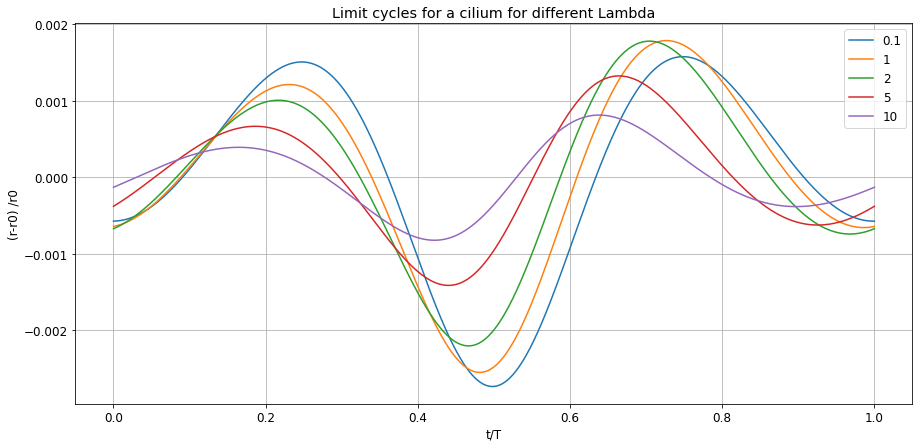

In [18]:
fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

x1, y1= limit_arr(p1, r1)
x2, y2= limit_arr(p2, r2)
x3, y3= limit_arr(p3, r3)
x4, y4= limit_arr(p4, r4)
x5, y5= limit_arr(p5, r5)

ax1.plot (x1,y1)
ax1.plot (x2,y2)
ax1.plot (x3,y3)
ax1.plot (x4,y4)
ax1.plot (x5,y5)

ax1.legend(['0.1', '1', '2' , '5', '10'])
ax1.set_title('Limit cycles for a cilium for different Lambda')
ax1.set_xlabel("t/T")
ax1.set_ylabel("(r-r0) /r0")

    
fig1.set_size_inches(15,7)
plt.grid()

**Figure 3e**

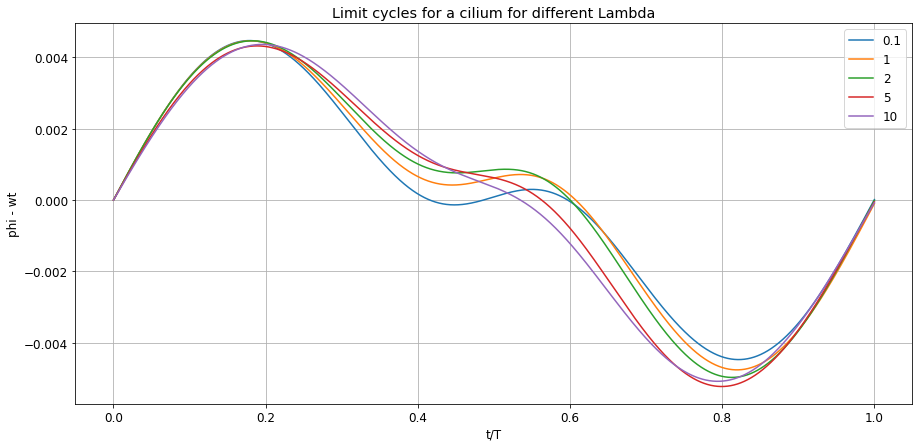

In [87]:
fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

x1, y1= limit_arr2(p1, r1)
x2, y2= limit_arr2(p2, r2)
x3, y3= limit_arr2(p3, r3)
x4, y4= limit_arr2(p4, r4)
x5, y5= limit_arr2(p5, r5)

ax1.plot (x1,y1- 2*np.pi*x1 -y1[0])
ax1.plot (x2,y2- 2*np.pi*x2 -y2[0])
ax1.plot (x3,y3- 2*np.pi*x3 -y3[0])
ax1.plot (x4,y4- 2*np.pi*x4 -y4[0])
ax1.plot (x5,y5- 2*np.pi*x5 -y5[0])

ax1.legend(['0.1', '1', '2' , '5', '10'])
ax1.set_title('Limit cycles for a cilium for different Lambda')
ax1.set_xlabel("t/T")
ax1.set_ylabel("phi - wt")

    
fig1.set_size_inches(15,7)
plt.grid()

**Figure 4**

We will need to define Big Phi in the Brumley paper.

Figure 3e shoes the amount of adjustment we need when converting between big and small phi.

In [31]:
def big_phi(phi, y):
    
    '''Maps phi (array) -> Big phi (array)'''
    '''This relies on the limit cycle found in 3e'''
    
    l_space= np.linspace(0, 2*np.pi, len(y))
    
    adj= (y- l_space -y[0])
    p= np.array(phi)
    
    index= (p%(2*np.pi)/ (2*np.pi) * len(y)).astype(int)
    
    return phi - adj[index] 

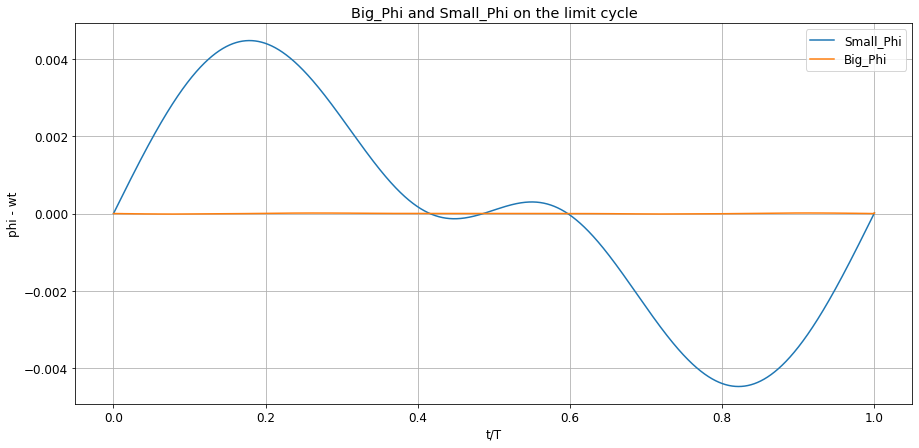

In [161]:
p_mod= big_phi(p1, y1)

fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

x1, y1= limit_arr2(p1, r1)
x_1, y_1= limit_arr2(p_mod, r1)

ax1.plot (x1,y1- 2*np.pi*x1 -y1[0])
ax1.plot (x_1, y_1- 2*np.pi*x_1 -y_1[0])


ax1.legend(['Small_Phi', 'Big_Phi'])
ax1.set_title('Big_Phi and Small_Phi on the limit cycle')
ax1.set_ylabel("phi - wt")
ax1.set_xlabel("t/T")

fig1.set_size_inches(15,7)
plt.grid()

In [45]:
def gen_system(p_diff, lamb=0.1):
    
    c1= Cilium([0, 0], [0, 0.5, 0], constants= np.array([r0, lamb ,10]) , a= 0.01 )
    c2= Cilium([2, 0], [0, 0.5, p_diff], constants= np.array([r0, lamb ,10]) , a= 0.01 )
    
    return c1, c2

In [46]:
def update2(c1, c2, stepsize=0.01):
        
    pos1= c1.pos
    pos2= c2.pos
    
    v1= velocity(c1)
    v2= velocity(c2)
    
    dr_phi1, dr1, dz1= c1.basis_change.T@ ff.Blake_Tensor(pos1, pos2)@ c2.basis_change @ c2.f_vector
    v1_mod= np.array([dz1, dr1 , dr_phi1 /c1.coor[1]])
    
    dr_phi2, dr2, dz2= c2.basis_change.T @ ff.Blake_Tensor(pos2, pos1)@ c1.basis_change @ c1.f_vector
    v2_mod= np.array([dz2, dr2 , dr_phi2 /c2.coor[1]])
    
    c1.coor += (v1 + v1_mod)* stepsize
    c2.coor += (v2 + v2_mod)* stepsize
        
update2(Cilium_a1, Cilium_b1)  

In [64]:
def run_simul(p_diff, lamb=0.1, adj= y1, steps=30000):
    
    '''y1 used to scale to big phi'''
    
    phi1=[]
    phi2=[]

    c1, c2= gen_system(p_diff, lamb)
    
    for i in range(steps):
        update2(c1, c2, stepsize=0.1)
        
        phi1.append(c1.coor[-1])
        phi2.append(c2.coor[-1])
        
    big_phi1= big_phi(np.array(phi1), adj)
    big_phi2= big_phi(np.array(phi2), adj)
    
    diff= big_phi2-big_phi1
    
    beats= np.array(phi1)/(2*np.pi)
    
    return beats, diff
    

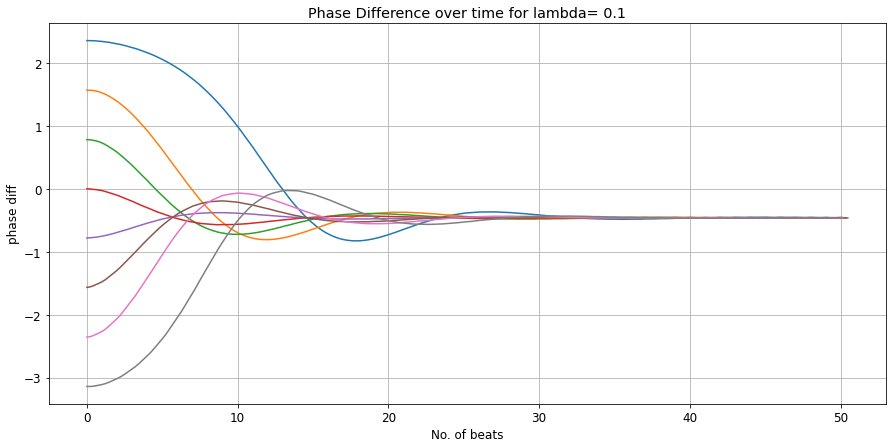

In [59]:
p_diffs= np.array([3/4 , 1/2, 1/4, 0, -1/4, -1/2, -3/4, -1])*np.pi

fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

for pd in p_diffs:
    beats, diff= run_simul(pd, lamb=0.1, adj= y1)
    
    ax1.plot (beats, diff)

ax1.set_title('Phase Difference over time for lambda= 0.1')
ax1.set_ylabel("phase diff")
ax1.set_xlabel("No. of beats")

fig1.set_size_inches(15,7)
plt.grid()

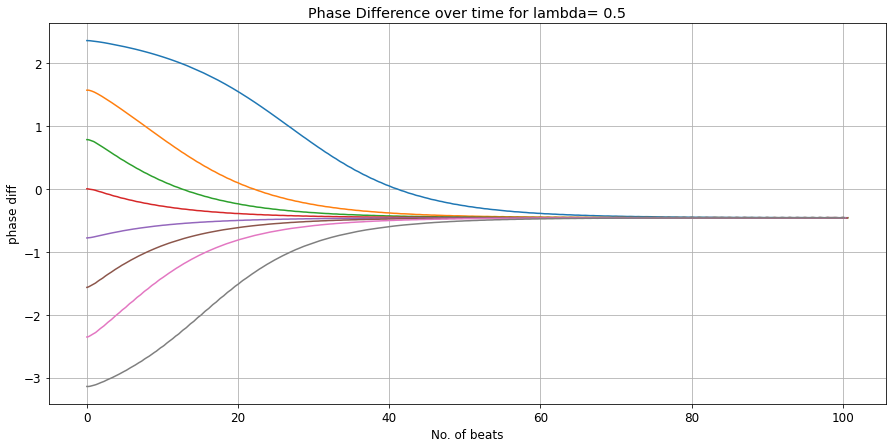

In [65]:
'''Limit cycle needs to be generated for lambda= 0.5'''

Cilia_05= Cilium([0, 0], [0, 0.5, np.pi], constants= np.array([0.5, 0.5 ,10]), a= 0.01)

p05=[]

r05=[]


for i in range (100000):
    update(Cilia_05, stepsize= 0.02)

for j in range(150000):
    
    update(Cilia_05, stepsize= 0.001)
    
    c05= Cilia_05.coor

    p05.append(c05[-1])
    r05.append(c05[1])
    
x05, y05= limit_arr2(p05, r05)

p_diffs= np.array([3/4 , 1/2, 1/4, 0, -1/4, -1/2, -3/4, -1])*np.pi

fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

for pd in p_diffs:
    beats, diff= run_simul(pd, lamb=0.5, adj= y05, steps=60000)
    
    ax1.plot (beats, diff)

ax1.set_title('Phase Difference over time for lambda= 0.5')
ax1.set_ylabel("phase diff")
ax1.set_xlabel("No. of beats")

fig1.set_size_inches(15,7)
plt.grid()

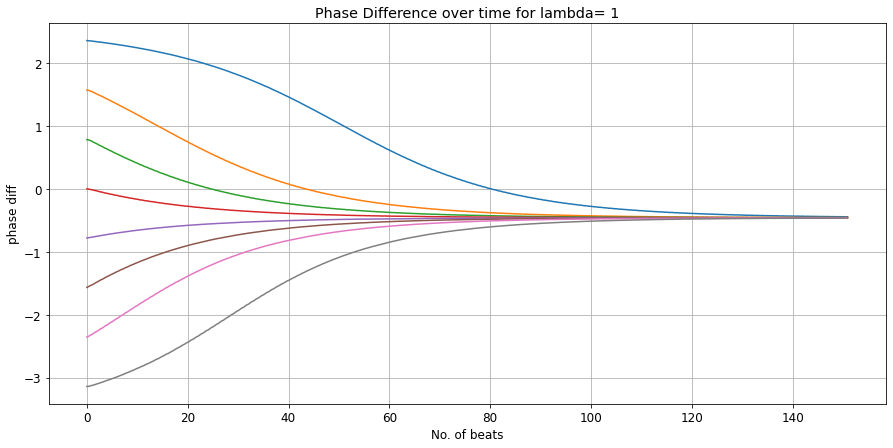

In [66]:
p_diffs= np.array([3/4 , 1/2, 1/4, 0, -1/4, -1/2, -3/4, -1])*np.pi

fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

for pd in p_diffs:
    beats, diff= run_simul(pd, lamb=1, adj= y2, steps=90000)
    
    ax1.plot (beats, diff)

ax1.set_title('Phase Difference over time for lambda= 1')
ax1.set_ylabel("phase diff")
ax1.set_xlabel("No. of beats")

fig1.set_size_inches(15,7)
plt.grid()

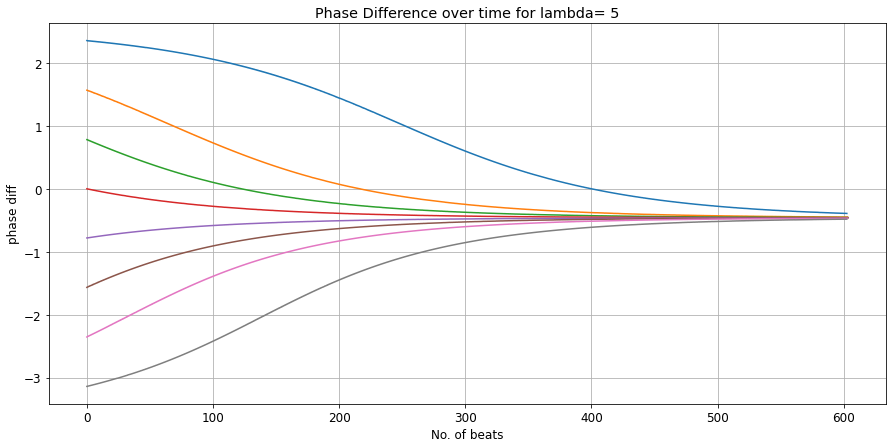

In [67]:
p_diffs= np.array([3/4 , 1/2, 1/4, 0, -1/4, -1/2, -3/4, -1])*np.pi

fig1, ax1 = plt.subplots()
    
plt.rcParams.update({'font.size': 12})

for pd in p_diffs:
    beats, diff= run_simul(pd, lamb=5, adj= y4, steps=360000)
    
    ax1.plot (beats, diff)

ax1.set_title('Phase Difference over time for lambda= 5')
ax1.set_ylabel("phase diff")
ax1.set_xlabel("No. of beats")

fig1.set_size_inches(15,7)
plt.grid()